In [65]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
import scipy.integrate as integrate
from scipy import signal

In [2]:
# Define useful functions in math
# Gaussian
def fct_Gauss(x,esp,var):
    return ((1./np.sqrt(var*2*np.pi))*np.exp(-0.5*(x-esp)**2/var))
# Delta
def delta(n):
    if n == 0:
        return 1
    else:
        return 0

Amplitude: [0.10721838 0.66948761 0.92606569 0.5033565  0.24808891 0.25647571
 0.45484813 0.80311973 0.39844477 0.03068097]
Distance: [93 37 51 73 42 42 11 88 43 57]


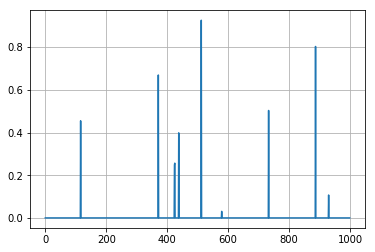

In [93]:
fi = []
n = 100
n_pic = 10

amp = np.random.rand(n_pic)
dis = np.random.randint(n, size=n_pic)

for i,j in product(range(n),range(n_pic)):
    fi.append(amp[j]*delta(i-dis[j]))

print('Amplitude:', amp)
print('Distance:', dis)
plt.figure()
plt.plot(fi)
plt.grid(True)

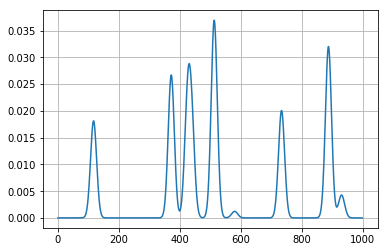

In [99]:
sigma = 100
esperance = len(fi)/2
x = np.arange(0,len(fi),1)
fo = np.convolve(fi, fct_Gauss(x,esperance,sigma),mode='same')
#fo_manual = np.take(fo,x)
plt.figure()
plt.plot(fo)
plt.grid(True)
plt.show()

In [47]:
result_fi = integrate.trapz(fi)
result_fo = integrate.trapz(fo)
print(result_fi)
print (result_fo)

58.469019187344735
58.46901918734473


In [30]:
print(np.max(fi))
print(np.max(fo))

0.9702071359953344
0.15253142144294082


In [ ]:
# critère de Rayleigh ￼1.22λ/D


In [66]:
pic_i,_ = signal.find_peaks(fi)
pic_o,_ = signal.find_peaks(fo)
print(pic_i)
print(pic_o)
prominences_i = signal.peak_prominences (fi, pic_i)[0]
prominences_o = signal.peak_prominences (fo, pic_o)[0]
print(prominences_i)
print(prominences_o)

# 1 peak at 807 disappeared after convolution, meaning distance between 2 peaks = 6 is
# not enough to resolve two distinct narrow lines.
# 2 peaks at 280,296 are still distinguishable, meaning distance = 16 is enough

[ 39 225 280 296 464 608 782 801 807 953]
[ 40 226 281 297 465 609 783 802 954]
[0.10609927 0.25640151 0.82870736 0.10163032 0.28377189 0.68730423
 0.95087709 0.88058641 0.04478304 0.09950267]
[0.01338513 0.03234675 0.10454696 0.00999784 0.0357997  0.08670798
 0.11995945 0.10928186 0.01255292]


In [80]:
signal.argrelmin(fo)

(array([133, 253, 291, 381, 537, 696, 793, 881]),)

In [85]:
print(fo[291])
print(fo[281])
contraste1 = fo[281]/fo[291] # Contraste local simplifiée 
print('contraste =',contraste1)

0.002823784592756345
0.10454695961613834
contraste = 37.023702121020584


In [86]:
print(fo[782])
print(fo[793])
contraste2 = fo[782]/fo[793] # Contraste local simplifiée 
print('contraste =',contraste2)

0.11410895414920172
0.002743837018727324
contraste = 41.587365929674995
